In [1]:
import json

from GEE_Processor import gee_processor
from Fire_Detector import fire_detector

In [2]:
# 1 Load the configuration file.
with open('input.json', 'r') as f:
    config = json.load(f)

In [3]:
# 2 Pre-process and download the NDVI time series data from GEE

# Get the selected remote sensing data
processor = gee_processor(
    study_area_shp_path=config['gee_processor']['study_area_shp_path'],
    start_date=config['gee_processor']['start_date'],
    end_date=config['gee_processor']['end_date'],
    land_cover_data=config['gee_processor']['land_cover_data'],
    remote_sensing_data=config['gee_processor']['remote_sensing_data']
)

# Get the NDVI stack
NDVI_stack = processor.NDVI_Exract_Stack()

# Export the NDVI stack
band_names = processor.export_image(
    NDVI_stack,
    filename=config['export_image']['image_path'],
    filename_band_name=config['export_image']['image_band_name'],
    scale=config['export_image']['scale'],
    crs=config['export_image']['crs'],
    unmask_value=config['export_image']['unmask_value']
)

# Visualize the study area and the NDVI stack
processor.geemap_export(NDVI_stack,config['export_image']['geemap_html'])


Google Earth Engine has initialized successfully!
Generating URL ...
Please wait ...
Data downloaded to c:\Users\risen\OneDrive - University of Twente\EMSITS\Fire_Detection_BEAST\MODIS_File\NDVI_stack.tif
Exporting MODIS_File/NDVI_stack.tif to GeoTIFF...
Band names saved to MODIS_File/band_name.npy
Geemap saved to MODIS_File/Map.html.


In [ ]:
import geemap
Map = geemap.Map()
Map.addLayer(processor.study_area, {}, 'Study Area')
Map.addLayer(NDVI_stack, {}, 'NDVI Stack')
Map.centerObject(processor.study_area, 10)
Map

In [ ]:
# 3 Fire Detection with Rbeast
%%capture
detector = fire_detector(
    file_path=config['export_image']['image_path'],
    file_band_names=config['export_image']['image_band_name'],
    unmask_value=config['export_image']['unmask_value'],
    nan_ratio_threshold=config['fire_detector']['nan_ratio_threshold'],
    BEAST_belief_threshold=config['fire_detector']['BEAST_belief_threshold'],
    result_directory=config['fire_detector']['result_directory'],
    result_table_path=config['fire_detector']['result_table_path']
)
ts = detector.detect_fire()
#detector.fire_visualization()

In [4]:
import io
import contextlib

# 创建一个字符串流对象
output = io.StringIO()

# 使用 contextlib.redirect_stdout 将输出重定向到字符串流对象
with contextlib.redirect_stdout(output):
    detector = fire_detector(
        file_path=config['export_image']['image_path'],
        file_band_names=config['export_image']['image_band_name'],
        crs=config['export_image']['crs'],
        unmask_value=config['export_image']['unmask_value'],
        nan_ratio_threshold=config['fire_detector']['nan_ratio_threshold'],
        BEAST_belief_threshold=config['fire_detector']['BEAST_belief_threshold'],
        result_directory=config['fire_detector']['result_directory']
    )
    ts = detector.detect_fire()

Detecting fire:   0%|          | 0/10120 [00:00<?, ?it/s]


INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.
              : Num_of_DataPoints_per_Period = period/deltaTime = 1/0.0217391 = 46
Has

Detecting fire:   0%|          | 1/10120 [00:00<44:24,  3.80it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 2/10120 [00:00<55:05,  3.06it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 3/10120 [00:00<51:12,  3.29it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 4/10120 [00:01<48:47,  3.46it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 5/10120 [00:01<47:32,  3.55it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 6/10120 [00:01<46:48,  3.60it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 7/10120 [00:02<51:24,  3.28it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 8/10120 [00:02<52:38,  3.20it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 9/10120 [00:02<50:49,  3.32it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 10/10120 [00:02<47:56,  3.51it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 11/10120 [00:03<48:20,  3.48it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 12/10120 [00:03<45:57,  3.67it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 13/10120 [00:03<44:45,  3.76it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 14/10120 [00:03<44:48,  3.76it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 15/10120 [00:04<46:14,  3.64it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 16/10120 [00:04<46:10,  3.65it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 17/10120 [00:04<49:00,  3.44it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 18/10120 [00:05<49:28,  3.40it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 19/10120 [00:05<51:03,  3.30it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 20/10120 [00:05<51:29,  3.27it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 21/10120 [00:06<49:20,  3.41it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 22/10120 [00:06<54:10,  3.11it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 23/10120 [00:06<54:52,  3.07it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 24/10120 [00:07<52:59,  3.18it/s]

/Progress:100.0% done[==============================================================]


Detecting fire:   0%|          | 25/10120 [00:07<50:34,  3.33it/s]


INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.
              : Num_of_DataPoints_per_Period = period/deltaTime = 1/0.0217391 = 46
Has

Detecting fire:   0%|          | 26/10120 [00:07<50:42,  3.32it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 27/10120 [00:07<49:34,  3.39it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 28/10120 [00:08<52:04,  3.23it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 29/10120 [00:08<49:08,  3.42it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 30/10120 [00:08<49:53,  3.37it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 31/10120 [00:09<50:37,  3.32it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 32/10120 [00:09<51:05,  3.29it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 33/10120 [00:09<52:15,  3.22it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 34/10120 [00:10<54:44,  3.07it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 35/10120 [00:10<56:25,  2.98it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 36/10120 [00:10<55:40,  3.02it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 37/10120 [00:11<55:48,  3.01it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 38/10120 [00:11<54:15,  3.10it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 39/10120 [00:11<55:19,  3.04it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 40/10120 [00:12<55:51,  3.01it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 41/10120 [00:12<55:44,  3.01it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 42/10120 [00:12<55:44,  3.01it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 43/10120 [00:13<56:49,  2.96it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 44/10120 [00:13<1:02:46,  2.68it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 45/10120 [00:13<1:01:55,  2.71it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 46/10120 [00:14<55:45,  3.01it/s]  

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 47/10120 [00:14<51:01,  3.29it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 48/10120 [00:14<48:28,  3.46it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 49/10120 [00:15<48:35,  3.45it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   0%|          | 50/10120 [00:15<49:05,  3.42it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 51/10120 [00:15<47:48,  3.51it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 52/10120 [00:15<46:10,  3.63it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 53/10120 [00:16<43:57,  3.82it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 54/10120 [00:16<45:58,  3.65it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 55/10120 [00:16<46:53,  3.58it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 56/10120 [00:16<46:52,  3.58it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 57/10120 [00:17<47:00,  3.57it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 58/10120 [00:17<49:32,  3.39it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 59/10120 [00:17<55:05,  3.04it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 60/10120 [00:18<55:42,  3.01it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 61/10120 [00:18<57:39,  2.91it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 62/10120 [00:19<57:15,  2.93it/s]


INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.
              : Num_of_DataPoints_per_Period = period/deltaTime = 1/0.0217391 = 46
Has

Detecting fire:   1%|          | 63/10120 [00:19<58:58,  2.84it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 64/10120 [00:19<1:05:33,  2.56it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 65/10120 [00:20<1:00:43,  2.76it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 66/10120 [00:20<57:48,  2.90it/s]  

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 67/10120 [00:20<59:27,  2.82it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 68/10120 [00:21<55:38,  3.01it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 69/10120 [00:21<55:56,  2.99it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 70/10120 [00:21<54:05,  3.10it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 71/10120 [00:22<50:45,  3.30it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 72/10120 [00:22<50:24,  3.32it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 73/10120 [00:22<55:07,  3.04it/s]

-Progress:100.0% done[==============================================================]


Detecting fire:   1%|          | 74/10120 [00:22<52:22,  3.20it/s]


INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.
              : Num_of_DataPoints_per_Period = period/deltaTime = 1/0.0217391 = 46
Has

Detecting fire:   1%|          | 75/10120 [00:23<49:55,  3.35it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 76/10120 [00:23<50:04,  3.34it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 77/10120 [00:23<53:40,  3.12it/s]

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 78/10120 [00:24<52:30,  3.19it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 79/10120 [00:24<55:43,  3.00it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 80/10120 [00:25<1:04:28,  2.60it/s]

/Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 81/10120 [00:25<59:43,  2.80it/s]  

-Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 82/10120 [00:25<57:14,  2.92it/s]

\Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 83/10120 [00:26<59:04,  2.83it/s]

|Progress:100.0% done[==============================================================]

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 235
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0217391 year = 0.26087 months = 7.93478 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.


Detecting fire:   1%|          | 84/10120 [00:26<58:13,  2.87it/s]

/Progress:100.0% done[==============================================================]


In [4]:
import pickle

# with open('ts.pkl', 'wb') as f:
#     pickle.dump(ts, f)
# with open('d.pkl', 'wb') as f:
#     pickle.dump(detector, f)

In [5]:
with open('ts.pkl', 'rb') as f:
    ts = pickle.load(f)
# with open('d.pkl', 'wb') as f:
#     detector=pickle.load(f)

In [11]:
detector.crs

'EPSG:2232'

c:\Users\risen\OneDrive - University of Twente\EMSITS\Fire_Detection_BEAST\Fire_Detector.py:148: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_transformed, lat_transformed, image_class, cmap=cmap)


Fire detection visualisation saved to Fire_Detection_Result/Fire_Detection_Result.png
Fire detection visualisation saved to Fire_Detection_Result/Fire_Time_Count_by_Half_Year.png
Result Raster image saved to Fire_Detection_Result/Fire_Detection_Result.tif
Confusion Matrix:
[[8336  232]
 [ 418 1134]]
Accuracy: 0.94
Precision: 0.83
Recall: 0.73
F1 Score: 0.78
Kappa Score: 0.74


c:\Users\risen\OneDrive - University of Twente\EMSITS\Fire_Detection_BEAST\Fire_Detector.py:283: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_transformed, lat_transformed, result_raster, cmap=cmap)


Fire detection visualisation saved to Fire_Detection_Result//Validation_Result/validation_result.png


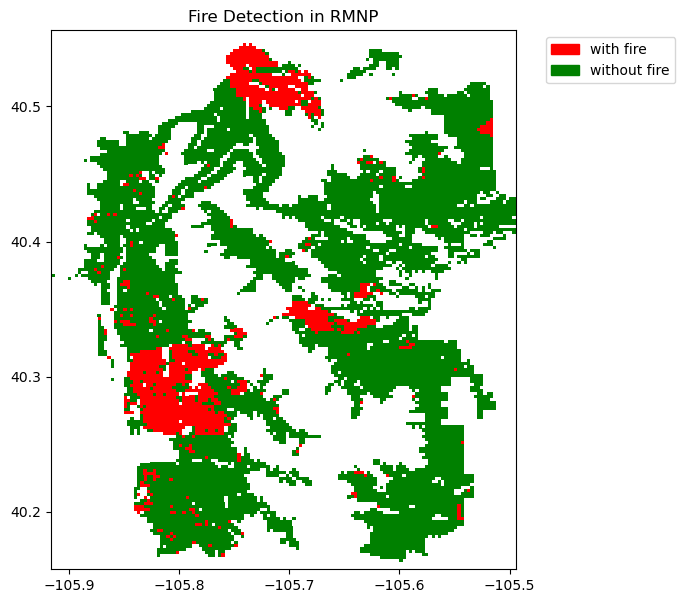

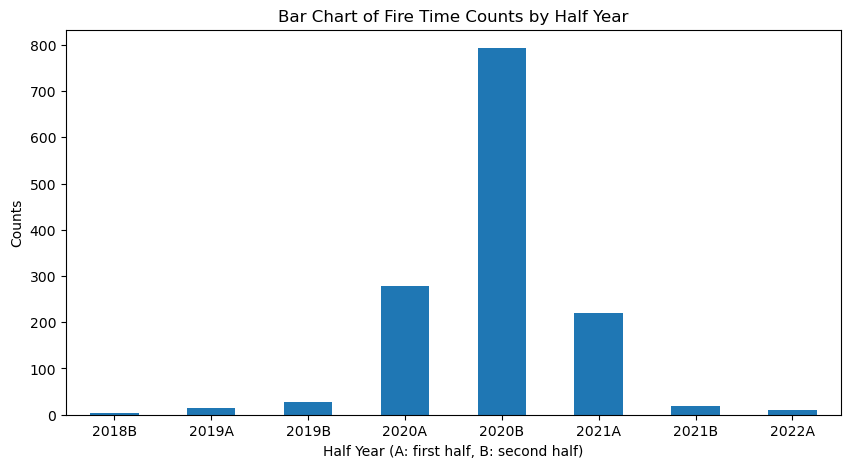

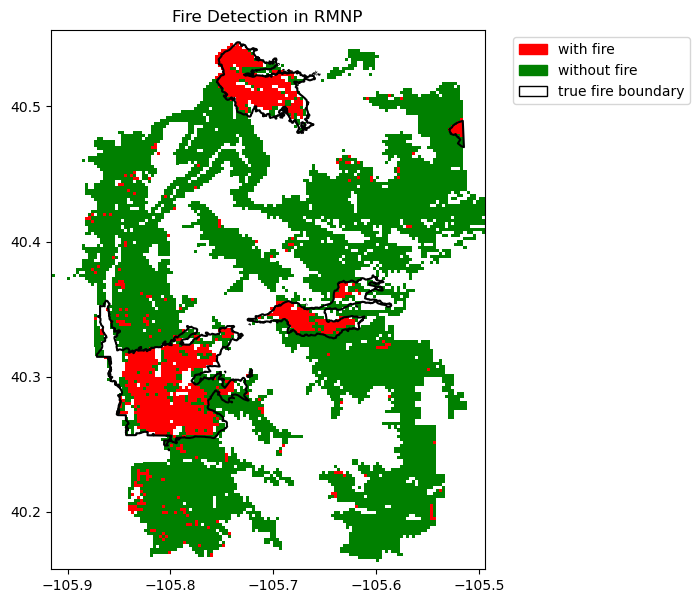

In [6]:
image = detector.fire_visualization(ts)
detector.fire_visualization_by_time(ts)
result_raster_path = detector.result_exported_as_raster(image)
validation_shp_path = config['fire_detector']['validation_shp_path']
detector.result_validation(result_raster_path,validation_shp_path)

In [ ]:
detector.transform

In [ ]:
import pyproj
import os
import sys
#os.environ['PROJ_LIB'] = os.path.dirname(sys.argv[0])
pyproj.datadir.get_data_dir()
pyproj.datadir.set_data_dir(os.path.dirname(sys.argv[0])) 
transformer = pyproj.Transformer.from_crs("EPSG:2232", 'EPSG:4326', always_xy=True)

In [ ]:
print(detector.crs)